In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('assets/input_image_arnold.png', 0)  #read the image

In [3]:
resized_img = cv2.resize(img, (256, 256))   #resize the image to 256x256

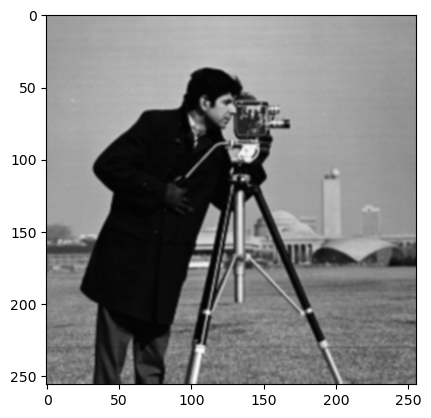

In [4]:
plt.imshow(resized_img, cmap='gray', interpolation='bicubic')

In [5]:
#show the pixel values of the resized image
resized_img

array([[157, 159, 157, ..., 150, 151, 151],
       [158, 155, 157, ..., 153, 154, 151],
       [157, 157, 156, ..., 151, 153, 153],
       ...,
       [120, 129, 117, ..., 134, 130, 113],
       [121, 127, 134, ..., 134, 126, 112],
       [121, 127, 141, ..., 132, 127, 112]], dtype=uint8)

In [6]:
# Show the maximum and minimum values of the greyscale image
max_value = np.max(resized_img)
min_value = np.min(resized_img)

print("Maximum Value:", max_value)
print("Minimum Value:", min_value)

Maximum Value: 253
Minimum Value: 4


In [7]:
def arnold_scramble (img, iterations):
    rows, cols = img.shape
    new_img = np.zeros_like(img)

    for ctr in range (0, iterations):
        for i in range (0, rows):
            for j in range (0, cols):

                new_i = (i + j) % rows
                new_j = (i + (2*j)) % cols
                new_img[new_i, new_j] = img[i, j]
        
        img = new_img.copy()

        # This code is to visualise the arnold cat transform after every 10 iterations
        # if(ctr % 10 == 0):
        #     plt.imshow(new_img, cmap='gray', interpolation='bicubic')
        #     plt.show()

    
    # This code is to visualise the final arnold cat transform. The recovered image is the same as the original image
        
    # plt.imshow(new_img, cmap='gray', interpolation='bicubic')
    # plt.show()

    return new_img

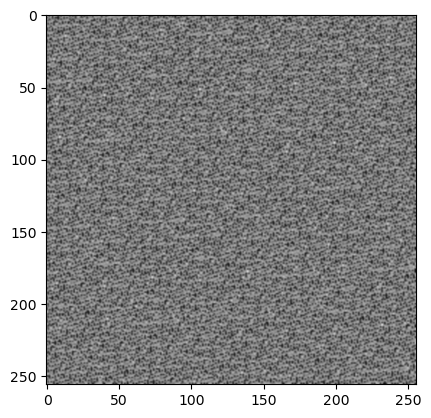

Maximum Value: 253
Minimum Value: 4


In [10]:
resized_img=arnold_scramble(resized_img, 100)

max_value = np.max(resized_img)
min_value = np.min(resized_img)

print("Maximum Value:", max_value)
print("Minimum Value:", min_value)

cv2.imwrite('generated_assets/arnold.png', resized_img)